In [141]:
from lstm_module import LSTM_SS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

warnings.filterwarnings("ignore")

In [142]:
df = pd.read_csv('C:/Users/shail/Desktop/standarddataset/AirPassengers.csv', parse_dates=True)
df['Month']= pd.to_datetime(df['Month'])
df['Month']= df['Month'].dt.strftime('%Y-%m-%d')
df['Month']= pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
#df.index.freq='MS'

In [143]:
train = df.iloc[:132]
test = df.iloc[132:]

scaler = MinMaxScaler()

In [144]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

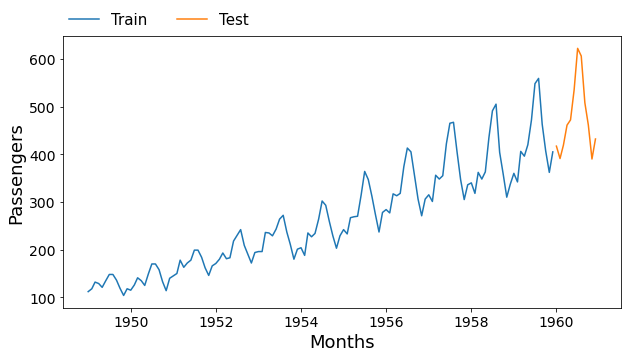

In [145]:
plt.figure(figsize=(10, 5))

plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')

plt.xlabel('Months', fontsize=18)
plt.ylabel('Passengers', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=3, 
           borderaxespad=0, frameon=False, prop={"size":15})

plt.show()


In [146]:
n_input = 12
n_features = 1

def generate_data(data, n_input):
    X, y = [], []
    for i in range(0,len(data)-n_input):
            X.append(data[i:i+n_input])
            y.append(data[i+n_input])
    return np.array(X), np.array(y)

X, y = generate_data(scaled_train, n_input)

# Original LSTM

In [147]:
model = Sequential()
model.add(LSTM(200, input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(loss='mse')

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.fit(X, y, epochs=50, verbose=0)

In [149]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)
    
test_predictions

[array([0.49969518], dtype=float32),
 array([0.48926896], dtype=float32),
 array([0.52554184], dtype=float32),
 array([0.56356233], dtype=float32),
 array([0.6318881], dtype=float32),
 array([0.70854056], dtype=float32),
 array([0.76167446], dtype=float32),
 array([0.7485205], dtype=float32),
 array([0.6765305], dtype=float32),
 array([0.61085033], dtype=float32),
 array([0.55398387], dtype=float32),
 array([0.5176143], dtype=float32)]

In [150]:
true_predictions = scaler.inverse_transform(test_predictions)

test['original_LSTM'] = true_predictions

<AxesSubplot:xlabel='Month'>

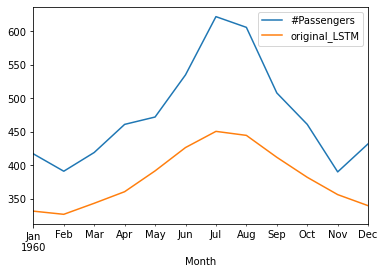

In [151]:
test.plot()

In [152]:
rmse = sqrt(mean_squared_error(test['#Passengers'], test['original_LSTM']))
print(rmse)

102.58479936858144


In [153]:
test

,#Passengers,original_LSTM
Month,,
1960-01-01,417,331.361308
1960-02-01,391,326.617376
1960-03-01,419,343.121538
1960-04-01,461,360.420862
1960-05-01,472,391.509082
1960-06-01,535,426.385954
1960-07-01,622,450.561881
1960-08-01,606,444.576825
1960-09-01,508,411.821369


# SELF_MADE_LSTM

In [154]:
self_model = LSTM_SS(1, 1, 200, n_input, 0.01)

In [155]:
self_model.fit(50, X, y, verbose=False)

In [156]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = self_model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)
    
test_predictions

[array([0.65199069]),
 array([0.7761005]),
 array([0.8067269]),
 array([0.84553312]),
 array([1.00749863]),
 array([1.29248613]),
 array([1.41402119]),
 array([1.11597496]),
 array([0.81843544]),
 array([0.66388577]),
 array([0.75823729]),
 array([0.80224141])]

In [157]:
true_predictions = scaler.inverse_transform(test_predictions)

test['SELF_MADE_LSTM'] = true_predictions

<AxesSubplot:xlabel='Month'>

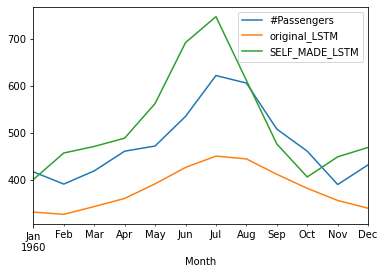

In [158]:
test.plot()

In [159]:
rmse = sqrt(mean_squared_error(test['#Passengers'], test['SELF_MADE_LSTM']))
print(rmse)

73.93044625838513


In [160]:
test

,#Passengers,original_LSTM,SELF_MADE_LSTM
Month,,,
1960-01-01,417,331.361308,400.655766
1960-02-01,391,326.617376,457.125729
1960-03-01,419,343.121538,471.060738
1960-04-01,461,360.420862,488.717571
1960-05-01,472,391.509082,562.411879
1960-06-01,535,426.385954,692.081190
1960-07-01,622,450.561881,747.379642
1960-08-01,606,444.576825,611.768606
1960-09-01,508,411.821369,476.388127
